# Problem Statement 
**Data Preparation:**
- Visualize sample images from each class.
- Normalize image pixels to [0,1].
- Convert labels to one-hot encoding and format data for CNNs.
 
**Model Development:**
- Model 1: Build a shallow neural network.
- Model 2: Create a basic CNN.
- Model 3: Design a deeper CNN with a different architecture.

**Training & Validation:**
- Train each model and monitor performance using validation data.
- Optionally, save the best model weights.

**Model Evaluation:**
- Test each model's accuracy.
- Form a committee by averaging predictions and evaluate combined accuracy.

**Performance Analysis:**
- Generate confusion matrices and classification reports.

# Labels
Each training and test example is assigned to one of the following labels:

- <span style="color:blue">**0:** T-shirt/top</span>  
- <span style="color:green">**1:** Trouser</span>  
- <span style="color:red">**2:** Pullover</span>  
- <span style="color:purple">**3:** Dress</span>  
- <span style="color:orange">**4:** Coat</span>  
- <span style="color:brown">**5:** Sandal</span>  
- <span style="color:pink">**6:** Shirt</span>  
- <span style="color:cyan">**7:** Sneaker</span>  
- <span style="color:magenta">**8:** Bag</span>  
- <span style="color:yellow">**9:** Ankle boot</span>
 Ankle boot
ot Ankle boot Ankle boot Ankle boot

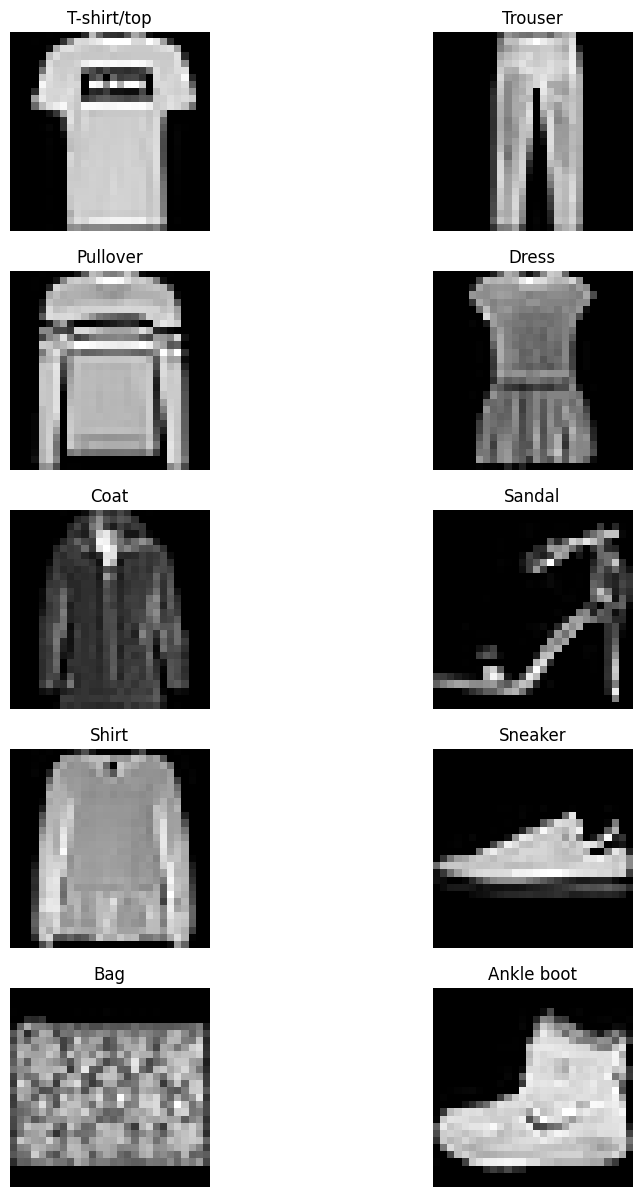

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names in the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot a sample image from each class
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    class_indices = np.where(train_labels == i)[0]
    sample_index = class_indices[0]
    plt.imshow(train_images[sample_index], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.show()


# Normalization: Scale the Images to Have Pixel Values Between [0,1]

In [26]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0


# Data Formatting: Convert Labels to One-Hot Encoded Vectors

In [30]:
# One-hot encode the labels
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)


# Prepare Data Suitable for CNNs

In [31]:
# Reshape images to include the channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


# Model Development

# Model 1: Shallow Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model1 = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten input image to a vector
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   # Second hidden layer
    Dense(10, activation='softmax') # Output layer
])


C:\Users\achan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Model 2: Basic Convolutional Neural Network (CNN)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Convolutional layer
    MaxPooling2D((2, 2)),                                          # Max pooling layer
    Flatten(),                                                      # Flatten layer
    Dense(64, activation='relu'),                                  # Dense layer
    Dense(10, activation='softmax')                                # Output layer
])


# Model 3: Deeper Convolutional Neural Network (CNN)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model3 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), # First convolutional layer
    MaxPooling2D((2, 2)),                                          # Max pooling layer
    Conv2D(128, (3, 3), activation='relu'),                        # Second convolutional layer
    MaxPooling2D((2, 2)),                                          # Second max pooling layer
    Flatten(),                                                      # Flatten layer
    Dense(128, activation='relu'),                                  # Dense layer
    Dense(10, activation='softmax')                                # Output layer
])


# Preparation

In [38]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)


# Compile Models

In [39]:
from tensorflow.keras.optimizers import Adam

# Compile Model 1
model1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile Model 2
model2.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile Model 3
model3.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train Models

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define callback to save best weights
checkpoint1 = ModelCheckpoint('model1_best_weights.keras', save_best_only=True, monitor='val_loss', mode='min')
checkpoint2 = ModelCheckpoint('model2_best_weights.keras', save_best_only=True, monitor='val_loss', mode='min')
checkpoint3 = ModelCheckpoint('model3_best_weights.keras', save_best_only=True, monitor='val_loss', mode='min')

# Train Model 1
history1 = model1.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[checkpoint1]
)

# Train Model 2
history2 = model2.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[checkpoint2]
)

# Train Model 3
history3 = model3.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[checkpoint3]
)


Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7554 - loss: 0.6911 - val_accuracy: 0.8333 - val_loss: 0.4890
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8553 - loss: 0.3995 - val_accuracy: 0.8746 - val_loss: 0.3453
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8720 - loss: 0.3479 - val_accuracy: 0.8655 - val_loss: 0.3643
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8806 - loss: 0.3217 - val_accuracy: 0.8832 - val_loss: 0.3230
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8871 - loss: 0.3062 - val_accuracy: 0.8803 - val_loss: 0.3242
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8896 - loss: 0.2977 - val_accuracy: 0.8808 - val_loss: 0.3270
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8969 - loss: 0.2759 - val_accuracy: 0.8936 - val_loss: 0.3033
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9032 - loss: 0.2607 - 

# Monitor Training

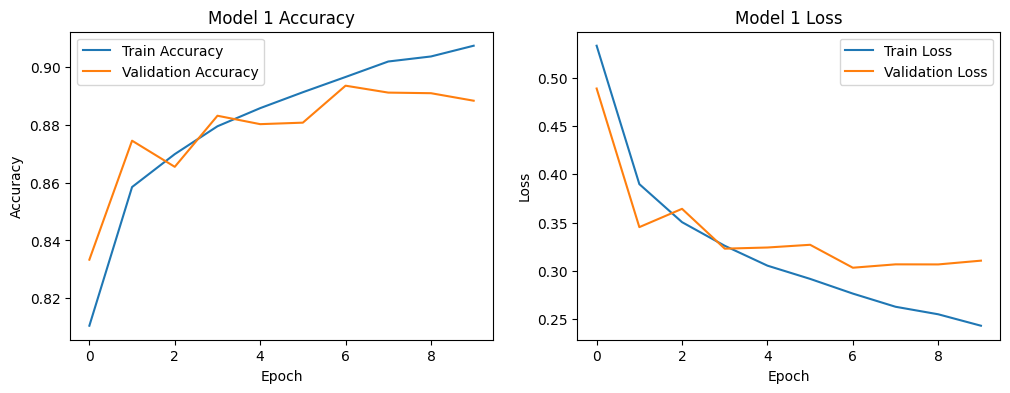

In [42]:
import matplotlib.pyplot as plt

# Plotting training and validation metrics for Model 1
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

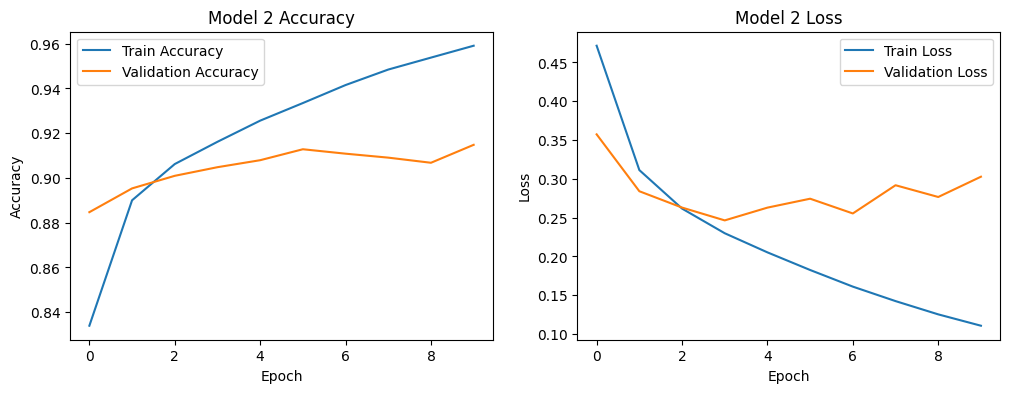

In [43]:
# Plotting training and validation metrics for Model 2
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


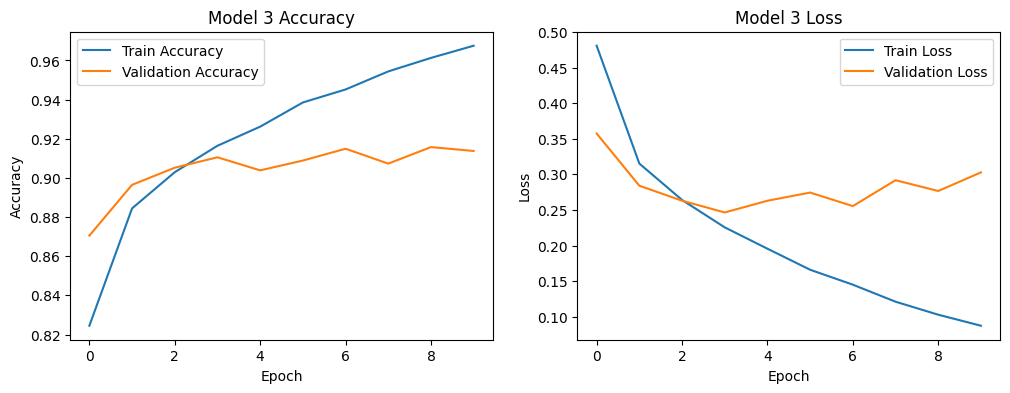

In [44]:
# Plotting training and validation metrics for Model 3
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 3 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate Each Model

In [46]:
# Evaluate Model 1
test_loss1, test_accuracy1 = model1.evaluate(test_images, test_labels, verbose=2)
print(f"Model 1 Test Accuracy: {test_accuracy1:.4f}")

# Evaluate Model 2
test_loss2, test_accuracy2 = model2.evaluate(test_images, test_labels, verbose=2)
print(f"Model 2 Test Accuracy: {test_accuracy2:.4f}")

# Evaluate Model 3
test_loss3, test_accuracy3 = model3.evaluate(test_images, test_labels, verbose=2)
print(f"Model 3 Test Accuracy: {test_accuracy3:.4f}")


313/313 - 0s - 2ms/step - accuracy: 0.8761 - loss: 0.3639
Model 1 Test Accuracy: 0.8761
313/313 - 1s - 3ms/step - accuracy: 0.9073 - loss: 0.3006
Model 2 Test Accuracy: 0.9073
313/313 - 3s - 8ms/step - accuracy: 0.9035 - loss: 0.3397
Model 3 Test Accuracy: 0.9035


# Construct the Committee

In [47]:
import numpy as np

# Get predictions from each model
preds1 = model1.predict(test_images)
preds2 = model2.predict(test_images)
preds3 = model3.predict(test_images)

# Average the predictions
avg_preds = (preds1 + preds2 + preds3) / 3

# Convert averaged predictions to class labels
final_preds = np.argmax(avg_preds, axis=1)

# Calculate accuracy of the committee
committee_accuracy = np.mean(final_preds == test_labels)
print(f"Committee Test Accuracy: {committee_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Committee Test Accuracy: 0.9197


# Generate Predictions

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from each model
preds1 = model1.predict(test_images)
preds2 = model2.predict(test_images)
preds3 = model3.predict(test_images)

# Average predictions for the committee
avg_preds = (preds1 + preds2 + preds3) / 3
final_preds_committee = np.argmax(avg_preds, axis=1)

# Convert predictions to class labels
final_preds1 = np.argmax(preds1, axis=1)
final_preds2 = np.argmax(preds2, axis=1)
final_preds3 = np.argmax(preds3, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


# Confusion Matrices

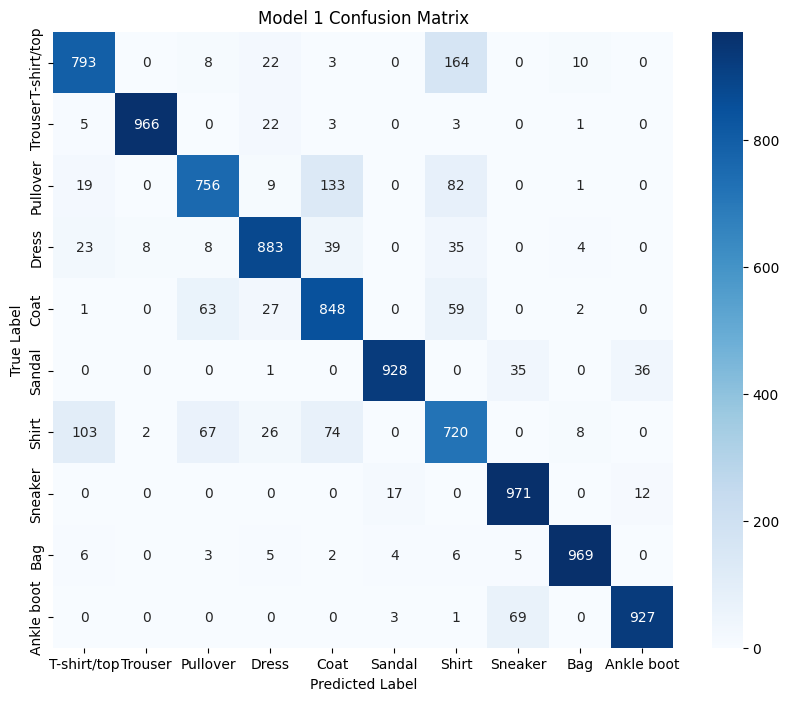

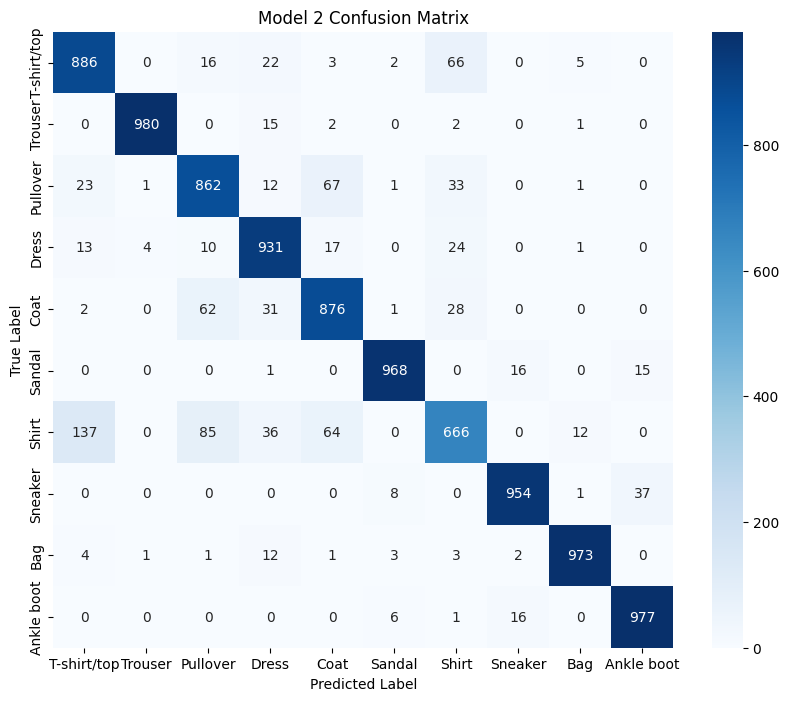

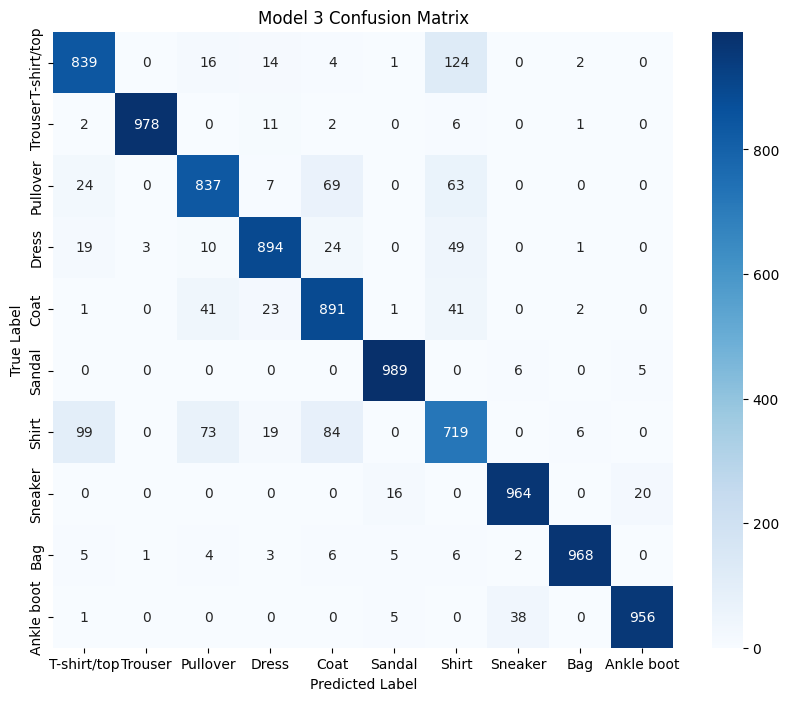

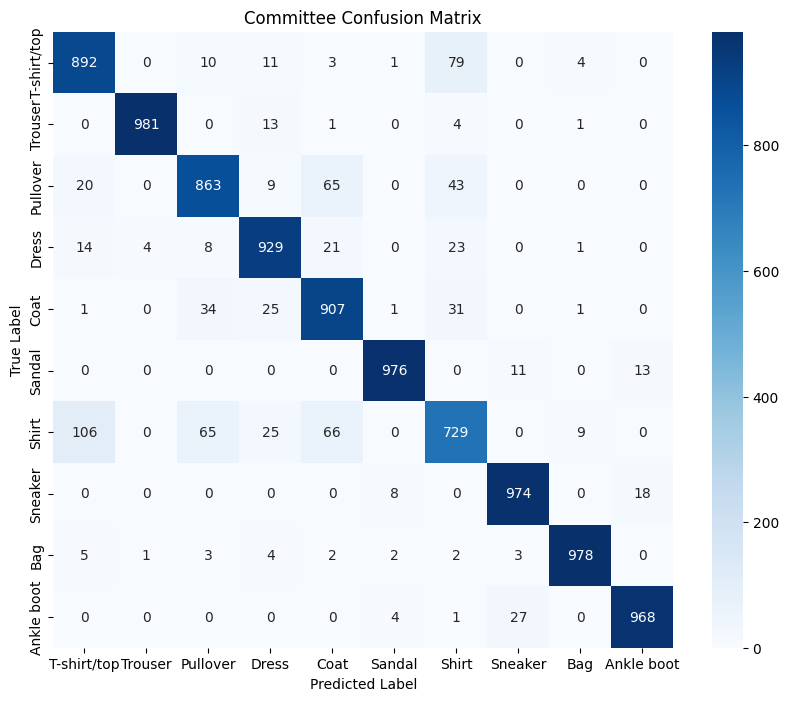

In [49]:
def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(test_labels, final_preds1, class_names, 'Model 1 Confusion Matrix')
plot_confusion_matrix(test_labels, final_preds2, class_names, 'Model 2 Confusion Matrix')
plot_confusion_matrix(test_labels, final_preds3, class_names, 'Model 3 Confusion Matrix')
plot_confusion_matrix(test_labels, final_preds_committee, class_names, 'Committee Confusion Matrix')


# Classification Reports

In [50]:
# Classification reports
report1 = classification_report(test_labels, final_preds1, target_names=class_names)
report2 = classification_report(test_labels, final_preds2, target_names=class_names)
report3 = classification_report(test_labels, final_preds3, target_names=class_names)
report_committee = classification_report(test_labels, final_preds_committee, target_names=class_names)

print("Model 1 Classification Report:\n", report1)
print("Model 2 Classification Report:\n", report2)
print("Model 3 Classification Report:\n", report3)
print("Committee Classification Report:\n", report_committee)


Model 1 Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.79      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.76      0.79      1000
       Dress       0.89      0.88      0.89      1000
        Coat       0.77      0.85      0.81      1000
      Sandal       0.97      0.93      0.95      1000
       Shirt       0.67      0.72      0.70      1000
     Sneaker       0.90      0.97      0.93      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.93      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Model 2 Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover  

The classification reports for the three individual models and the committee of models provide insight into their performance on the Fashion MNIST test set. Model 1, a shallow neural network, achieved an overall accuracy of 88%, with a weighted average precision, recall, and F1-score also at 88%. It struggled particularly with the "Shirt" class, where it showed a lower precision (67%) and recall (72%). Model 2, a basic CNN, improved the accuracy to 91%, showing better performance across most classes, particularly with the "T-shirt/top" and "Pullover" classes, where F1-scores were higher than in Model 1. However, it still faced challenges with the "Shirt" class, albeit with slightly improved metrics.

Model 3, a deeper CNN, achieved a 90% accuracy, showing improvements in handling the "T-shirt/top" and "Coat" classes compared to Model 2. The committee model, which averaged the predictions of all three models, further improved the overall accuracy to 92%. This combined approach enhanced the performance across most classes, particularly boosting the F1-score for the "T-shirt/top" class to 88% and reducing the misclassification rate for the "Shirt" class. The committee model's success highlights the effectiveness of ensemble methods in stabilizing and improving predictions by leveraging the strengths of multiple models.